In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [2]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [3]:
Train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
X_train = Train.iloc[:, 2:11]
Y_train = Train.iloc[:, 11]

In [5]:
X_train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [6]:
Gendermap = dict(zip(X_train['Gender'].tolist(), pd.factorize(X_train['Gender'])[0]))
X_train['Gender'] = X_train['Gender'].map(Gendermap)
Test['Gender'] = Test['Gender'].map(Gendermap)

In [7]:
X_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [8]:
Agemap = dict(zip(X_train['Age'].tolist(), pd.factorize(X_train['Age'])[0]))
X_train['Age'] = X_train['Age'].map(Agemap)
Test['Age'] = Test['Age'].map(Agemap)

In [9]:
X_train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [10]:
X_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
Citymap = dict(zip(X_train['City_Category'].tolist(), pd.factorize(X_train['City_Category'])[0]))
X_train['City_Category'] = X_train['City_Category'].map(Citymap)
Test['City_Category'] = Test['City_Category'].map(Citymap)

In [12]:
X_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
X_train['Stay_In_Current_City_Years'] = X_train['Stay_In_Current_City_Years'].replace('4+', 4)
Test['Stay_In_Current_City_Years'] = Test['Stay_In_Current_City_Years'].replace('4+', 4)

In [14]:
X_train['Marital_Status'].unique()

array([0, 1])

In [15]:
X_train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [16]:
X_train['Product_Category_2'].unique()

array([ nan,   6.,  14.,   2.,   8.,  15.,  16.,  11.,   5.,   3.,   4.,
        12.,   9.,  10.,  17.,  13.,   7.,  18.])

In [17]:
X_train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [18]:
len(X_train['Product_Category_2'].dropna())/len(X_train['Product_Category_2'])

0.6843335733036643

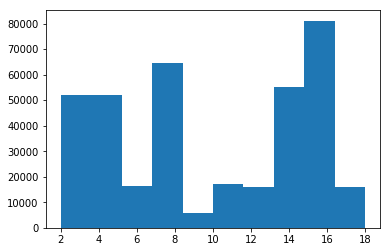

In [19]:
plt.hist(X_train['Product_Category_2'].dropna())
plt.show()

In [20]:
X_train['Product_Category_2'] = X_train['Product_Category_2'].fillna(0)
Test['Product_Category_2'] = Test['Product_Category_2'].fillna(0)

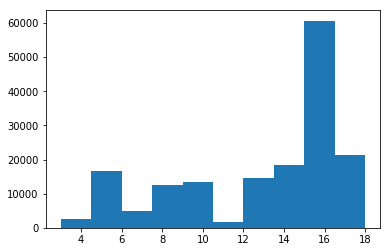

In [21]:
plt.hist(X_train['Product_Category_3'].dropna())
plt.show()

In [22]:
len(X_train['Product_Category_3'].dropna())/len(X_train['Product_Category_3'])

0.3032734134688802

In [23]:
X_train['Product_Category_3'] = X_train['Product_Category_3'].fillna(0)
Test['Product_Category_3'] = Test['Product_Category_3'].fillna(0)

In [24]:
rfr = ensemble.RandomForestRegressor()

In [25]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#cross_val_score(rfr(), X_train, Y_train, cv = cv, n_jobs = -1)

In [26]:
rfr.fit(X= X_train, y= Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
X_test = Test.iloc[:, 2:]

In [29]:
Y_ = rfr.predict(X_test)

In [30]:
Y_test = Test.iloc[:, :2]
Y_test['Purchase'] = Y_

In [34]:
Y_test.to_csv("SampleSubmission.csv")